# ORIE 4580/5580/5581 Assignment 5

#### Students: Oscar Callamari-Abrams (oc67), Riley Coogan (rmc329)

### Github link: [Github link](https://github.com/OscarC-A/4580-SimModeling)


In [ ]:
import pandas as pd
import numpy as np
import math
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt

### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

<hr>

## Ans.


Because each individual bird’s visits \( V \) are modeled as a Poisson random variable with rate  $\lambda$ , the total number of visits from all 10 tagged birds can be represented as:

$$
V_{\text{tagged}} \sim \text{Poisson}(10\lambda)
$$

By the additivity property of Poisson random variables, the sum of independent Poisson($\lambda$) variables is Poisson($k\lambda$), where k is the number of terms summed.


The expected value (mean) of a Poisson($\lambda$) random variable is its parameter $\lambda$ .  
The observed average number of visits from the 10 tagged birds is 6 per week.  
The likelihood (or equivalently, the probability mass function) of a Poisson random variable is maximized when its parameter equals the observed mean.  
Hence:

$$
10\lambda = 6 \quad \Rightarrow \quad \hat{\lambda} = 0.6
$$


Then, the total number of bird visits (tagged + untagged) is modeled as:

$$
V_{\text{total}} \sim \text{Poisson}(N\lambda)
$$

Given that the observed average number of total visits per week is 28.8, we again match the theoretical mean to the observed mean:

$$
N\lambda = 28.8
$$

Substituting \( $\hat{\lambda}$ = 0.6 \):

$$
N = \frac{28.8}{0.6} = 48
$$

Therefore, there are approximately 48 red-tailed hawks in total (including the 10 tagged birds).


<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.



Because the researcher identified individual birds, the sampling is without replacement from a finite population.  

Let:

- $N$ = the unknown total number of hawks in the population  
- $K = 10$ = number of tagged hawks in the population  
- $n = 20$ = number of unique hawks observed that week  
- $x = 4$ = number of tagged hawks among those observed  

Then, the number of tagged birds observed follows a Hypergeometric distribution:

$$
X \sim \text{Hypergeometric}(N, K, n)
$$

with probability mass function:

$$
P(X = x) = \frac{\binom{K}{x} \binom{N - K}{n - x}}{\binom{N}{n}}, \quad N \ge \max(K, n)
$$


The likelihood of observing $x = 4$ tagged birds is proportional to:

$$
L(N) \propto \frac{\binom{N - K}{n - x}}{\binom{N}{n}}
$$

Since $N$ is discrete, the maximum likelihood estimate can be found by examining the **ratio of successive likelihoods**:

$$
R(N) = \frac{L(N + 1)}{L(N)}
$$

Simplifying this ratio (using properties of binomial coefficients) gives:

$$
R(N) = \frac{(N + 1 - K)(N + 1 - n)}{(N + 1)(N + 1 - K - n + x)}
$$

The likelihood increases as long as $R(N) > 1$ and decreases once $R(N) < 1$.  
Setting $R(N) = 1$ and solving for $N$ yields:

$$
N = \frac{K n}{x} - 1
$$

By substituting in the known values we get:

$$
N = \frac{10 \times 20}{4} - 1 = 49
$$

Since we have found a value where R(N) is exactly 1, both $N = 49$ and $N = 50$ yield identical likelihoods.

Therefore, under the hypergeometric model, the maximum likelihood estimate for the total number of red-tailed hawks in Ithaca is approximately 50 (including the 10 tagged birds).



<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

## Ans.

Because we are modeling the demand as a geometric random variable, the pmf for k = 0 to k = 39 follows $(1-p)^kp$. But because the maximum possible seen demand is censored above 39, the pmf for k values equal to or above 40 becomes:

$P(39 < k \le \infty) = F(\infty) - F(39) = 1 - (1 - (1 - p)^{39 + 1})\\
= (1 - p)^{40}$

$P(Y = y) =
\begin{cases}
    0 & \text{for } y < 0 \\
    (1-p)^yp & \text{for } 0 \le y \le 39\\
    (1-p)^{40} & \text{for } y = 40\\
    0 & \text{for } y \ge 40
\end{cases}$

<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


In [ ]:
from logging import log
df = pd.read_csv('Soup_sales_data.csv')
values = df['Y']

def neg_log_likelihood(p): # negative because scipy is minimizing
    if p <= 0 or p >= 1:
        return np.inf
    log_likelihood = 0
    for y in values:
        if y < 40:
            log_likelihood += np.log(1-p) * y + np.log(p)
        else:
            log_likelihood += np.log(1-p) * 40
    return -log_likelihood

res = opt.minimize_scalar(neg_log_likelihood, bounds=(0,1), method='bounded')
print(res)

 message: Solution found.
 success: True
  status: 0
     fun: 303.993429732656
       x: 0.026795331532910284
     nit: 14
    nfev: 14


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

## Ans.

The probability that at least 2 people out of n people share a birthday is as follows:

$P(\text{shared bday}) = 1 - P(\text{no shared bday}) = 1 - \frac{\text{number of ways n people can have distinct bdays}}{\text{number of ways we can assign n bdays at all}}$

The number of ways n people can have distinct bdays is equal to the number of days in a year factorial, over the factorial of the number days in a year minus the number of people we have n. This comes to $\frac{365!}{(365-n)!}$

The number of ways we can assign n people a bday whatsoever is equal to the number of days in a year, to the power of people, n. This comes to $365^n$

All together we find:

$P(\text{at least 2 shared bdays amongst n people}) = 1 - \frac{365!}{365^n \times (365-n)!}$

Text(0.5, 1.0, 'Probability of shared birthday vs. n')

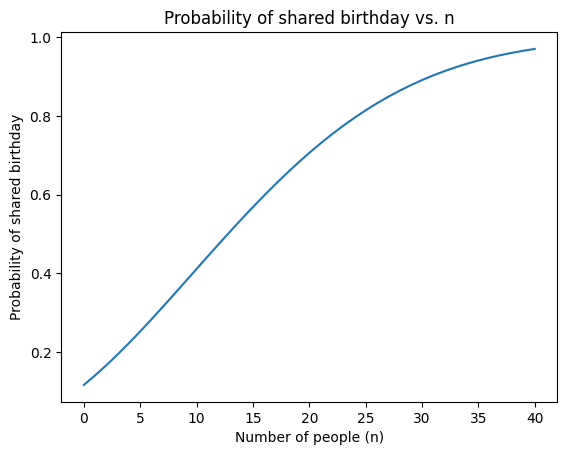

In [ ]:
def prob_shared_bday(low, up):
    # 365! / (365-n)! is the number of permutations of n distinct bdays out of
    # 365 days, so we can use math.perm(365, n)
    probs = []
    for n in range(low, up+1):
        num = math.perm(365, n)
        den = 365 ** n
        probs.append(1 - num/den)
    return probs

probs = prob_shared_bday(10, 50)
plt.plot(probs)
plt.xlabel("Number of people (n)")
plt.ylabel("Probability of shared birthday")
plt.title("Probability of shared birthday vs. n")

<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

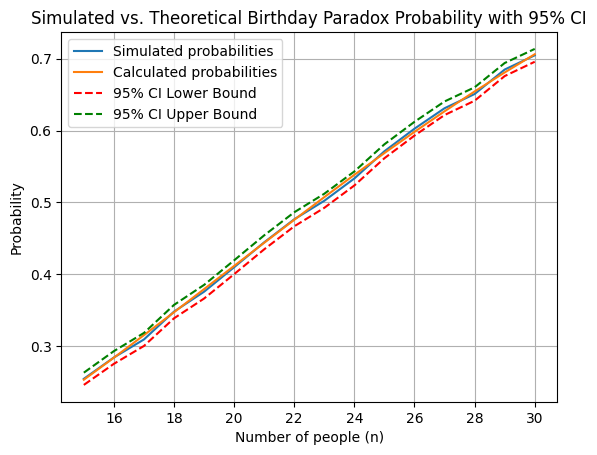

In [ ]:
def bday_prob(n, iters):
    count = 0
    for i in range(iters):
        bdays = np.random.randint(1, 366, n)
        unique_bdays = np.unique(bdays, axis=0)
        if len(bdays) != len(unique_bdays):
            count += 1

    p_hat = count / iters
    # Calculate standard error
    se = np.sqrt(p_hat * (1 - p_hat) / iters)
    # Calculate margin of error for 95% CI (Z-score for 95% is approximately 1.96)
    me = 1.96 * se
    lower_bound = p_hat - me
    upper_bound = p_hat + me
    lower_bound = np.clip(lower_bound, 0, 1)
    upper_bound = np.clip(upper_bound, 0, 1)

    return p_hat, lower_bound, upper_bound

probs = np.zeros(16)
lbs = np.zeros(16)
ubs = np.zeros(16)
for n in range(15, 31):
    probs[n-15], lbs[n-15], ubs[n-15] = bday_prob(n, 10000)

plt.plot(np.arange(15, 31), probs, label='Simulated probabilities')
plt.plot(np.arange(15, 31), prob_shared_bday(15, 30), label='Calculated probabilities')
plt.plot(np.arange(15, 31), lbs, linestyle='--', color='red', label='95% CI Lower Bound')
plt.plot(np.arange(15, 31), ubs, linestyle='--', color='green', label='95% CI Upper Bound')
plt.xlabel("Number of people (n)")
plt.ylabel("Probability")
plt.title("Simulated vs. Theoretical Birthday Paradox Probability with 95% CI")
plt.legend()
plt.grid(True)
plt.show()

<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

/tmp/ipython-input-436746803.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('bdaydata.txt', delim_whitespace=True,


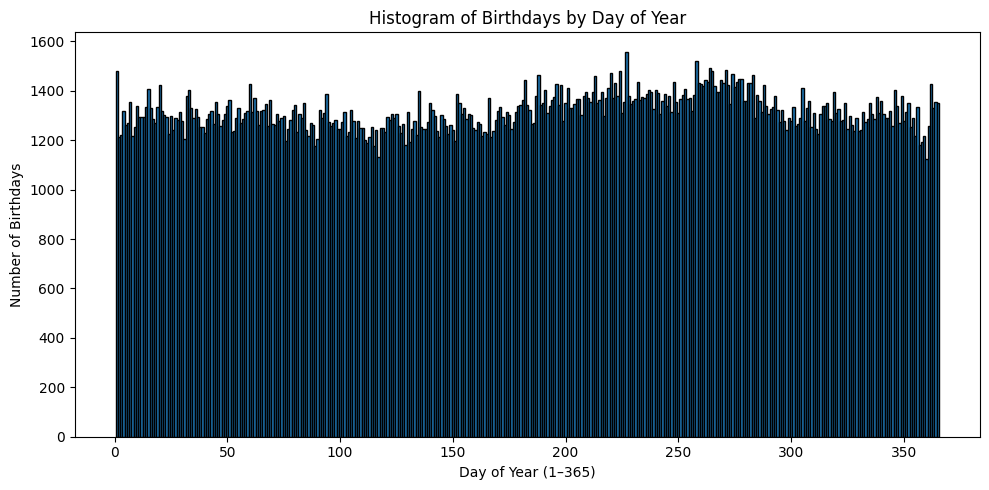

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read the data
# Make sure 'date' is read as a 4-char string like "0101", not as an int
df = pd.read_csv('bdaydata.txt', delim_whitespace=True,
                 names=['date', 'count'], header=0, dtype={'date': str})

# 2. Split MMDD into month and day *explicitly*
month = df['date'].str.slice(0, 2).astype(int)   # "01" -> 1, "11" -> 11
day   = df['date'].str.slice(2, 4).astype(int)   # "01" -> 1, "30" -> 30

# 3. Map (month, day) -> day_of_year 1..365 using exact month lengths
month_lengths = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
month_start   = np.concatenate(([0], np.cumsum(month_lengths[:-1])))
# month_start = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]

df['day_of_year'] = month_start[month - 1] + day

# 4. “Unroll” into individual birthdays
unrolled_days = np.repeat(df['day_of_year'].values, df['count'].values)

# 5. Histogram with bins aligned exactly to integer days
plt.figure(figsize=(10, 5))
plt.hist(unrolled_days, bins=np.arange(0.5, 366.5, 1), edgecolor='black')
plt.xlabel('Day of Year (1–365)')
plt.ylabel('Number of Birthdays')
plt.title('Histogram of Birthdays by Day of Year')
plt.tight_layout()
plt.show()


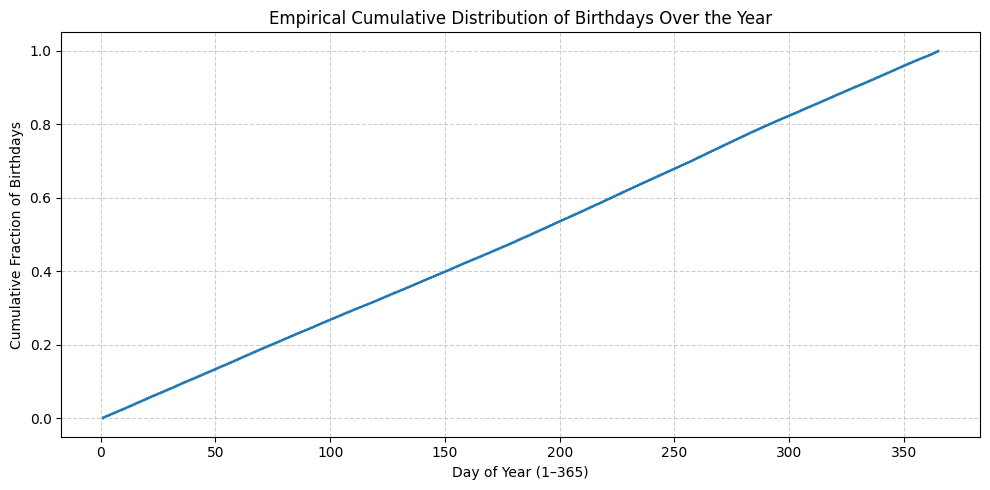

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df and unrolled_days are already defined
# (from the previous histogram step)

# 1. Sort the unrolled day-of-year values
sorted_days = np.sort(unrolled_days)

# 2. Compute the empirical cumulative distribution
yvals = np.arange(1, len(sorted_days) + 1) / len(sorted_days)

# 3. Plot ECDF
plt.figure(figsize=(10, 5))
plt.plot(sorted_days, yvals, drawstyle='steps-post')
plt.xlabel('Day of Year (1–365)')
plt.ylabel('Cumulative Fraction of Birthdays')
plt.title('Empirical Cumulative Distribution of Birthdays Over the Year')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


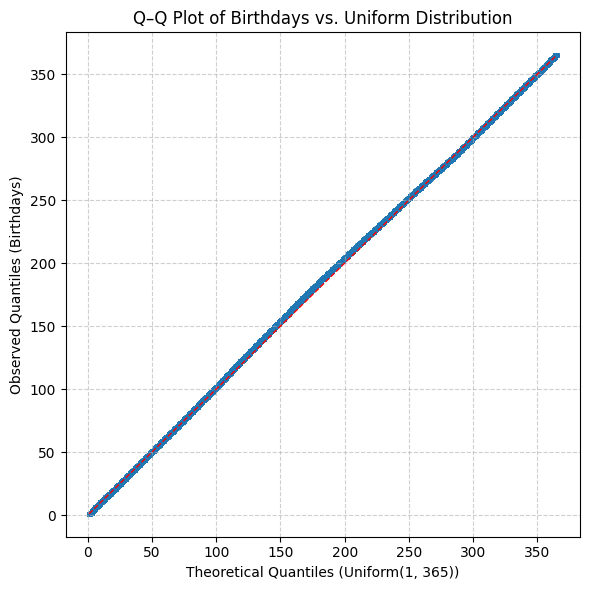

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assume unrolled_days already defined (day_of_year for each birthday)
# If not, construct it from counts:
# unrolled_days = np.repeat(df['day_of_year'].values, df['count'].values)

# 1. Sort observed data
observed = np.sort(unrolled_days)

# 2. Generate theoretical quantiles from a uniform distribution
N = len(observed)
theoretical = np.linspace(1, 365, N)


# 4. Q–Q plot
plt.figure(figsize=(6, 6))
plt.scatter(theoretical, observed, s=5, alpha=0.5)
plt.plot([1, 365], [1, 365], color='red', linestyle='--', linewidth=1)
plt.xlabel('Theoretical Quantiles (Uniform(1, 365))')
plt.ylabel('Observed Quantiles (Birthdays)')
plt.title('Q–Q Plot of Birthdays vs. Uniform Distribution')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Ans.

<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [ ]:
import numpy as np
import scipy.stats as stats

# observed counts per day
observed = df['count'].values

# total number of birthdays and number of days
total = observed.sum()
n_days = len(observed)

# expected count per day under uniform distribution (float!)
expected_per_day = total / n_days
expected = np.full(n_days, expected_per_day, dtype=float)

print("sum observed:", observed.sum())
print("sum expected:", expected.sum())

chi2_stat, p_chi2 = stats.chisquare(f_obs=observed, f_exp=expected)

print(f"\nChi-square statistic = {chi2_stat:.2f}")
print(f"Degrees of freedom   = {n_days - 1}")
print(f"p-value              = {p_chi2:.4e}")



sum observed: 480715
sum expected: 480714.9999999999

Chi-square statistic = 1352.72
Degrees of freedom   = 364
p-value              = 1.2489e-113


In [ ]:
# If not already defined:
# unrolled_days = np.repeat(df['day_of_year'].values, df['count'].values)

# Scale data to [0, 1] for KS test against Uniform(0,1)
scaled = (unrolled_days - 1) / 364

ks_stat, p_ks = stats.kstest(scaled, 'uniform')

print(f"KS statistic = {ks_stat:.4f}")
print(f"p-value      = {p_ks:.4e}")


KS statistic = 0.0141
p-value      = 1.6291e-83


<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.


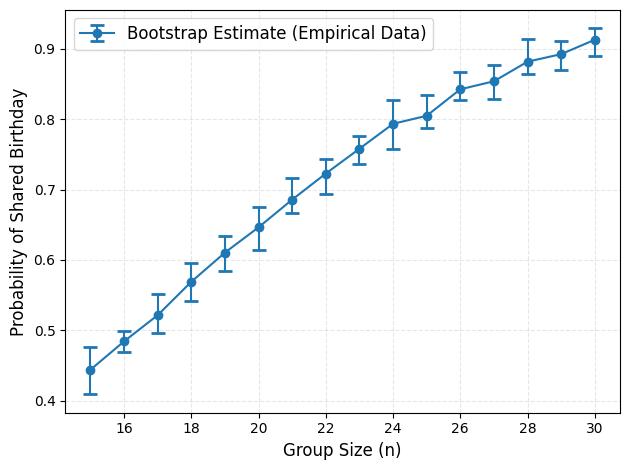

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Empirical distribution from your data
counts = df['count'].values
emp_p = counts / counts.sum()
days = np.arange(1, 366)

def boot_bday_matches(n, dist, sims):
    """
    For a given probability distribution `dist` over days 1..365,
    estimate P(at least one shared birthday in a group of size n)
    by Monte Carlo with `sims` simulations.
    """
    count = 0
    for _ in range(sims):
        bdays = np.random.choice(np.arange(1, 366), size=n, p=dist)
        # check for duplicates
        if len(bdays) != len(np.unique(bdays)):
            count += 1
    return count / sims

def boot_bday_sim(n, iters, sims):
    """
    Nonparametric bootstrap:
    - resample 365 days with replacement from the empirical distribution
    - build a bootstrap probability distribution over days
    - estimate match probability using that distribution
    - repeat `iters` times → get a bootstrap distribution of probabilities
    """
    probs = np.zeros(iters)
    for i in range(iters):
        # Step 1: bootstrap days for one "year"
        boot_days = np.random.choice(days, size=365, replace=True, p=emp_p)
        # Step 2: convert to counts/probabilities over 365 days
        boot_counts, _ = np.histogram(boot_days, bins=np.arange(1, 367))
        boot_prob_dist = boot_counts / boot_counts.sum()
        # Step 3: estimate birthday-match probability for this bootstrap world
        probs[i] = boot_bday_matches(n, boot_prob_dist, sims)
    # Return mean and 95% CI
    return probs.mean(), np.percentile(probs, 2.5), np.percentile(probs, 97.5)

people = np.arange(15, 31)
boot_est = np.zeros(len(people))
boot_lbs = np.zeros(len(people))
boot_ubs = np.zeros(len(people))


for i, n in enumerate(people):
    boot_est[i], boot_lbs[i], boot_ubs[i] = boot_bday_sim(n, iters=10, sims=1000)


plt.errorbar(
    people,
    boot_est,
    yerr=[boot_est - boot_lbs, boot_ubs - boot_est],
    fmt='o-',
    capsize=5,
    capthick=2,
    markersize=6,
    label='Bootstrap Estimate (Empirical Data)',
)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlabel('Group Size (n)', fontsize=12)
plt.ylabel('Probability of Shared Birthday', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


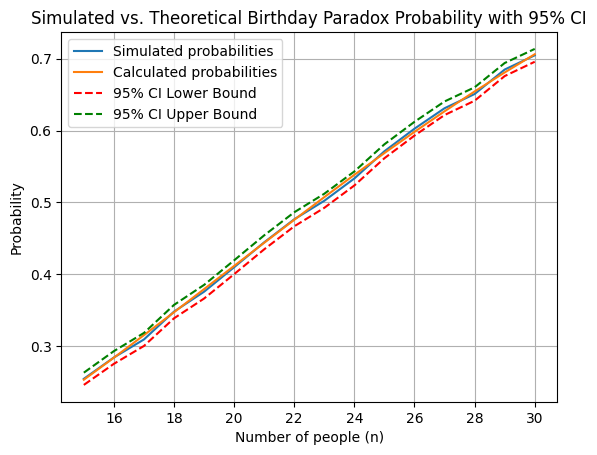

We can see that our new graph is very closely aligned with the last.

<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

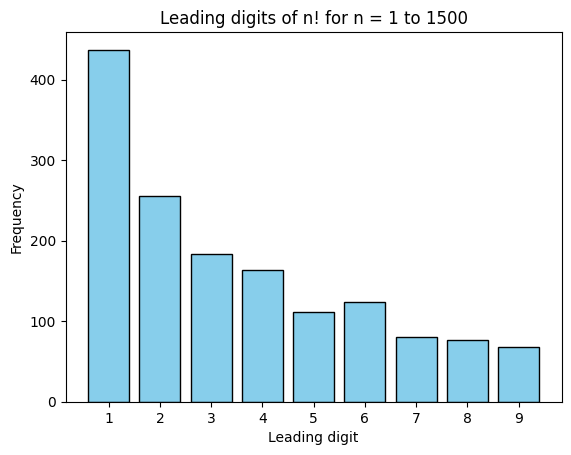

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
# number of factorials to compute
n = 1500

# compute the first n factorials exactly (as integers)
fact_series = factorial(np.arange(1, n + 1), exact=True)

# initialize array to store first digits
first_digit = np.zeros(n)

# extract the leading digit of each factorial
for i in range(n):
    first_digit[i] = int(str(fact_series[i])[0])

# plot histogram of leading digits
plt.hist(first_digit, bins=np.arange(0.5, 10.5, 1), rwidth=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Leading digit')
plt.ylabel('Frequency')
plt.title('Leading digits of n! for n = 1 to 1500')
plt.xticks(range(1, 10))
plt.show()


<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

Chi-square statistic: 667.5120000000002
p-value: 7.04135769230954e-139


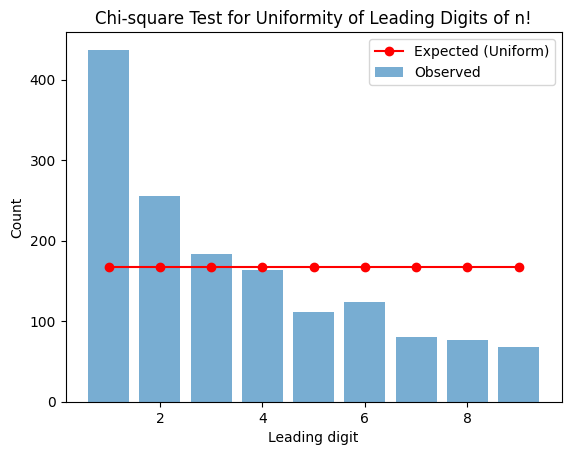

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.stats import chisquare

# number of samples
n = 1500

# compute factorials exactly
fact_series = factorial(np.arange(1, n + 1), exact=True)

# extract first digits
first_digit = np.zeros(n)
for i in range(n):
    first_digit[i] = int(str(fact_series[i])[0])

# count frequency of each leading digit (1 through 9)
counts = np.array([np.sum(first_digit == d) for d in range(1, 10)])

# expected counts for a uniform distribution
expected = np.ones(9) * (n / 9)

# perform chi-square goodness-of-fit test
chi2_stat, p_value = chisquare(f_obs=counts, f_exp=expected)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

# optional: visualize the distribution
plt.bar(range(1, 10), counts, alpha=0.6, label='Observed')
plt.plot(range(1, 10), expected, 'ro-', label='Expected (Uniform)')
plt.xlabel('Leading digit')
plt.ylabel('Count')
plt.title('Chi-square Test for Uniformity of Leading Digits of n!')
plt.legend()
plt.show()


<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

Chi-square statistic (Benford): 9.768287282336871
p-value: 0.2816672796372305


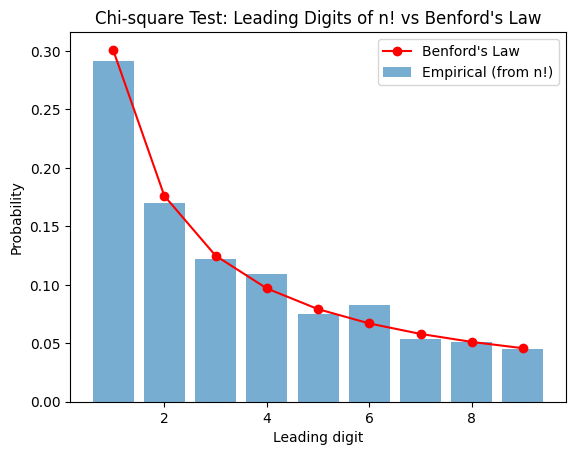

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.stats import chisquare

# number of samples
n = 1500

# compute factorials exactly
fact_series = factorial(np.arange(1, n + 1), exact=True)

# extract first digits
first_digit = np.zeros(n)
for i in range(n):
    first_digit[i] = int(str(fact_series[i])[0])

# count frequency of each leading digit (1 through 9)
counts = np.array([np.sum(first_digit == d) for d in range(1, 10)])

# ----- Benford's Law expected probabilities -----
# p(d) = log10(1 + 1/d)
benford_probs = np.array([np.log10(1 + 1/d) for d in range(1, 10)])
expected_benford = benford_probs * n  # expected counts under Benford's Law

# ----- Chi-square test -----
chi2_stat, p_value = chisquare(f_obs=counts, f_exp=expected_benford)

print("Chi-square statistic (Benford):", chi2_stat)
print("p-value:", p_value)

# ----- Visualization -----
plt.bar(range(1, 10), counts / n, alpha=0.6, label='Empirical (from n!)')
plt.plot(range(1, 10), benford_probs, 'ro-', label="Benford's Law")
plt.xlabel('Leading digit')
plt.ylabel('Probability')
plt.title("Chi-square Test: Leading Digits of n! vs Benford's Law")
plt.legend()
plt.show()


<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

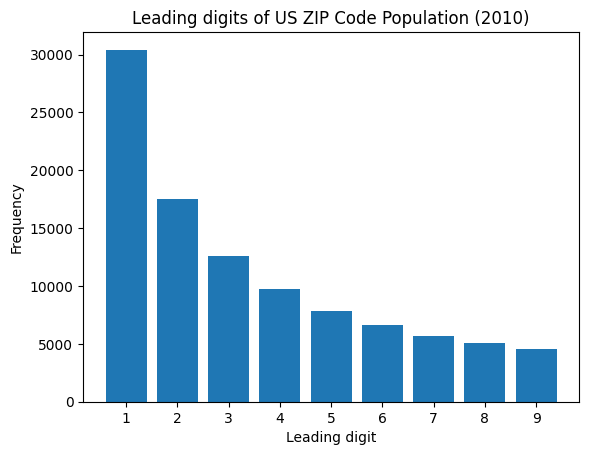

Uniform model:
  Chi-square statistic = 50323.53572
  p-value = 0.0

Benford's Law model:
  Chi-square statistic = 11.843226818111097
  p-value = 0.15833698137848726


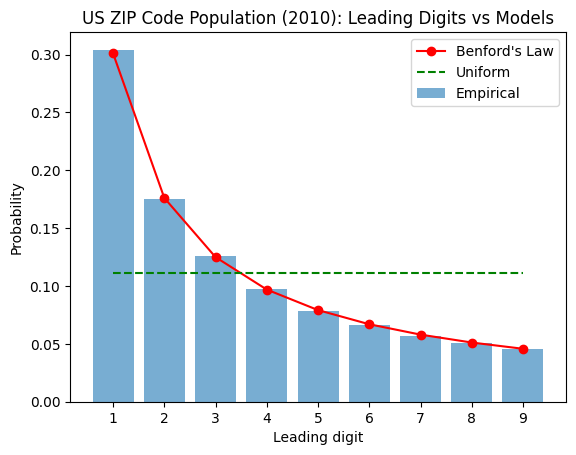

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# ---------------------------------------------------
# Load data
# ---------------------------------------------------
# Assumes us_pop.csv has one column with population values
# (adjust `iloc[:, 0]` if your population column is different)
data = pd.read_csv('us_pop.csv')
pop_values = data.iloc[:, 0].dropna().astype(float)

# ---------------------------------------------------
# Helper: extract leading digit (first non-zero digit)
# ---------------------------------------------------
def leading_digit(x):
    x = abs(x)
    if x == 0:
        return np.nan
    # assume population is integer-like; strip decimals if any
    s = str(int(x))
    return int(s[0])

first_digits = pop_values.apply(leading_digit).dropna()

# ---------------------------------------------------
# Histogram of leading digits
# ---------------------------------------------------
plt.figure()
plt.hist(first_digits, bins=np.arange(0.5, 10.5, 1), rwidth=0.8)
plt.xlabel('Leading digit')
plt.ylabel('Frequency')
plt.title('Leading digits of US ZIP Code Population (2010)')
plt.xticks(range(1, 10))
plt.show()

# ---------------------------------------------------
# Chi-square tests: Uniform vs Benford
# ---------------------------------------------------
# Observed counts
n = len(first_digits)
counts = np.array([np.sum(first_digits == d) for d in range(1, 10)])

# Expected under uniform distribution
expected_uniform = np.ones(9) * (n / 9)

chi2_uniform, p_uniform = chisquare(f_obs=counts, f_exp=expected_uniform)

print("Uniform model:")
print("  Chi-square statistic =", chi2_uniform)
print("  p-value =", p_uniform)

# Expected under Benford's Law: p(d) = log10(d+1) - log10(d) = log10(1 + 1/d)
benford_probs = np.array([np.log10(1 + 1.0 / d) for d in range(1, 10)])
expected_benford = benford_probs * n

chi2_benford, p_benford = chisquare(f_obs=counts, f_exp=expected_benford)

print("\nBenford's Law model:")
print("  Chi-square statistic =", chi2_benford)
print("  p-value =", p_benford)

# ---------------------------------------------------
# Plot empirical vs theoretical (Uniform & Benford)
# ---------------------------------------------------
plt.figure()
empirical_probs = counts / n

plt.bar(range(1, 10), empirical_probs, alpha=0.6, label='Empirical')
plt.plot(range(1, 10), benford_probs, 'ro-', label="Benford's Law")
plt.plot(range(1, 10), [1/9.0] * 9, 'g--', label='Uniform')

plt.xlabel('Leading digit')
plt.ylabel('Probability')
plt.title('US ZIP Code Population (2010): Leading Digits vs Models')
plt.xticks(range(1, 10))
plt.legend()
plt.show()


**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.